
# Proyecto final

In [3]:
#Importar librerías
import pandas as pd
import numpy as np
#Cargar datos desde github / local
df = pd.read_csv('https://raw.githubusercontent.com/Eduardo0912/Man_y_ana_datos/refs/heads/main/Datos_proyecto.csv')

In [4]:
#Tamaño del dataset
df.shape

(105, 14)

In [5]:
#Obtener el nombre de las columnas
list(df.columns)

['Company_ID',
 'Total_Revenue',
 'Short_Term_Debt',
 'Long_Term_Debt',
 'Current_Assets',
 'Current_Liabilities',
 'Equity',
 'Financial_Expenses',
 'Current_Ratio',
 'Debt_to_Equity_Ratio',
 'Interest_Coverage_Ratio',
 'Industry',
 'Country',
 'Company_Size']

In [ ]:
#Ver los primeros registros del dataset
df.head()

,Company_ID,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio,Industry,Country,Company_Size
0,C0001,3.347816e+10,5.495948e+08,2.278415e+09,6.538713e+09,1.331093e+08,2.293854e+10,3.864617e+08,49.12,0.12,86.63,Tecnología,Alemania,Mediana
1,C0002,2.477267e+10,1.320539e+09,1.651796e+09,1.939125e+10,8.864651e+08,2.949615e+10,1.652171e+08,21.87,0.10,149.94,Tecnología,México,Mediana
2,C0003,2.281084e+10,7.473215e+08,8.511983e+09,7.443570e+09,1.982664e+09,2.571465e+10,5.197711e+07,3.75,0.36,438.86,Retail,Alemania,Mediana
3,C0004,8.187718e+09,4.930008e+08,8.082415e+09,1.860758e+10,1.959019e+09,2.170094e+10,4.335059e+08,9.50,1271.00,18.89,Tecnología,Estados Unidos,Grande
4,C0005,1.484683e+10,1.943282e+09,2.758103e+09,4.151931e+09,1.651759e+09,8.839496e+09,1.665935e+07,2.51,0.53,891.20,Salud,Alemania,Mediana


In [ ]:
#Agregar la columna duplicados, indicando que se marque como duplicado el segundo registro
df['duplicados']=df.duplicated(subset=['Company_ID'], keep='first')
#Ver los registros con valores duplicados
df[df.duplicated(subset=['Company_ID'], keep='first')]

,Company_ID,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio,Industry,Country,Company_Size,duplicados
100,C0092,3.005507e+10,1.728002e+09,7.049495e+09,3.502172e+09,1.039391e+09,1.578266e+10,6.636620e+07,3.37,0.56,452.87,Tecnología,China,Pequeña,True
101,C0036,1.923468e+10,1.830762e+09,9.901867e+09,1.282829e+10,1.837340e+09,3.841258e+09,7.582360e+07,6.98,3.05,253.68,Manufactura,China,Grande,True
102,C0006,1.099748e+10,6.621239e+08,2.764835e+09,9.869102e+09,8.481944e+08,3.731250e+09,2.802825e+08,11.64,0.92,39.24,Salud,México,Mediana,True
103,C0022,6.793892e+09,8.491369e+08,7.138475e+09,1.164564e+09,7.802656e+08,1.634661e+10,1.436530e+08,1.49,0.49,47.29,Finanzas,Alemania,Pequeña,True
104,C0024,3.360170e+10,2.483761e+08,6.171294e+09,1.961213e+10,1.088339e+09,1.185662e+10,3.580051e+08,18.02,0.54,93.86,Manufactura,China,Pequeña,True


In [ ]:
#Revisamos la compañía C0092
df[df['Company_ID'] == 'C0092']


,Company_ID,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio,Industry,Country,Company_Size,duplicados
91,C0092,3.005507e+10,1.728002e+09,7.049495e+09,3.502172e+09,1.039391e+09,1.578266e+10,6.636620e+07,3.37,1271.00,452.87,Tecnología,China,Pequeña,False
100,C0092,3.005507e+10,1.728002e+09,7.049495e+09,3.502172e+09,1.039391e+09,1.578266e+10,6.636620e+07,3.37,0.56,452.87,Tecnología,China,Pequeña,True


In [ ]:
#Identificado que el valor de Debt_to_Equity_Ratio es diferente en los dos registros, hacemos una aprpxomación e identificamos que debemos mantener el segundo registro.
(df.iloc[91,3]+df.iloc[91,4]+df.iloc[91,5])/df.iloc[91,6]

0.73441703750577

In [ ]:
#Cambiamos los valores de duplicados para mantener el segundo registro
df.iloc[91,14]=True
df.iloc[92,14]=False

In [ ]:
#Revisamos ahora C0036, identificamos que las dos son iguales
df[df['Company_ID'] == 'C0036']

,Company_ID,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio,Industry,Country,Company_Size,duplicados
35,C0036,1.923468e+10,1.830762e+09,9.901867e+09,1.282829e+10,1.837340e+09,3.841258e+09,7.582360e+07,6.98,3.05,253.68,Manufactura,China,Grande,False
101,C0036,1.923468e+10,1.830762e+09,9.901867e+09,1.282829e+10,1.837340e+09,3.841258e+09,7.582360e+07,6.98,3.05,253.68,Manufactura,China,Grande,True


In [ ]:
#Revisamos ahora C0006, identificamos que las dos son iguales
df[df['Company_ID'] == 'C0006']

,Company_ID,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio,Industry,Country,Company_Size,duplicados
5,C0006,1.099748e+10,6.621239e+08,2.764835e+09,9.869102e+09,8.481944e+08,3.731250e+09,2.802825e+08,11.64,0.92,39.24,Salud,México,Mediana,False
102,C0006,1.099748e+10,6.621239e+08,2.764835e+09,9.869102e+09,8.481944e+08,3.731250e+09,2.802825e+08,11.64,0.92,39.24,Salud,México,Mediana,True


In [ ]:
#Revisamos ahora C0022, identificamos que las dos son iguales
df[df['Company_ID'] == 'C0022']

,Company_ID,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio,Industry,Country,Company_Size,duplicados
21,C0022,6.793892e+09,8.491369e+08,7.138475e+09,1.164564e+09,7.802656e+08,1.634661e+10,1.436530e+08,1.49,0.49,47.29,Finanzas,Alemania,Pequeña,False
103,C0022,6.793892e+09,8.491369e+08,7.138475e+09,1.164564e+09,7.802656e+08,1.634661e+10,1.436530e+08,1.49,0.49,47.29,Finanzas,Alemania,Pequeña,True


In [ ]:
#Revisamos ahora C0024, identificamos que las dos son iguales
df[df['Company_ID'] == 'C0024']

,Company_ID,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio,Industry,Country,Company_Size,duplicados
23,C0024,3.360170e+10,2.483761e+08,6.171294e+09,1.961213e+10,1.088339e+09,1.185662e+10,3.580051e+08,18.02,0.54,93.86,Manufactura,China,Pequeña,False
104,C0024,3.360170e+10,2.483761e+08,6.171294e+09,1.961213e+10,1.088339e+09,1.185662e+10,3.580051e+08,18.02,0.54,93.86,Manufactura,China,Pequeña,True


In [ ]:
#Eliminar duplicados
df = df[df['duplicados']==False]

In [ ]:
#Ver porcentaje de valores nulos por columna, ordenados de mayor a menor
(100*df.isnull().sum()/len(df)).sort_values(ascending=False)

,0
Financial_Expenses,4.040404
Total_Revenue,3.030303
Short_Term_Debt,3.030303
Company_ID,0.000000
Long_Term_Debt,0.000000
Current_Assets,0.000000
Current_Liabilities,0.000000
Equity,0.000000
Current_Ratio,0.000000
Debt_to_Equity_Ratio,0.000000


In [ ]:
#Conteo de valores nulos
df.isnull().sum()

,0
Company_ID,0
Total_Revenue,3
Short_Term_Debt,3
Long_Term_Debt,0
Current_Assets,0
Current_Liabilities,0
Equity,0
Financial_Expenses,4
Current_Ratio,0
Debt_to_Equity_Ratio,0


In [ ]:
#Revisamos cuantas empresas hay de cada tamaño
df.groupby('Company_Size').size()

,0
Company_Size,
Grande,41
Mediana,30
Pequeña,28


In [ ]:
#Revisamos el número de empresas por industria
df.groupby('Industry').size()

,0
Industry,
Finanzas,24
Manufactura,25
Retail,16
Salud,14
Tecnología,20


In [ ]:
#Revisamos el número de compañías por país
df.groupby('Country').size()

,0
Country,
Alemania,20
China,25
Estados Unidos,19
India,15
México,20


In [ ]:
#Agrupamos los datos por tamaño y calcula la media de Financial_Expenses, Total_Revenues y Short_Term_Debt para cada grupo
#Asimismo, sustituimos los valores nulos con esas medias
df['Financial_Expenses'] = df['Financial_Expenses'].fillna(df.groupby('Company_Size')['Financial_Expenses'].transform('mean'))
df['Total_Revenue'] = df['Total_Revenue'].fillna(df.groupby('Company_Size')['Total_Revenue'].transform('mean'))
df['Short_Term_Debt'] = df['Short_Term_Debt'].fillna(df.groupby('Company_Size')['Short_Term_Debt'].transform('mean'))


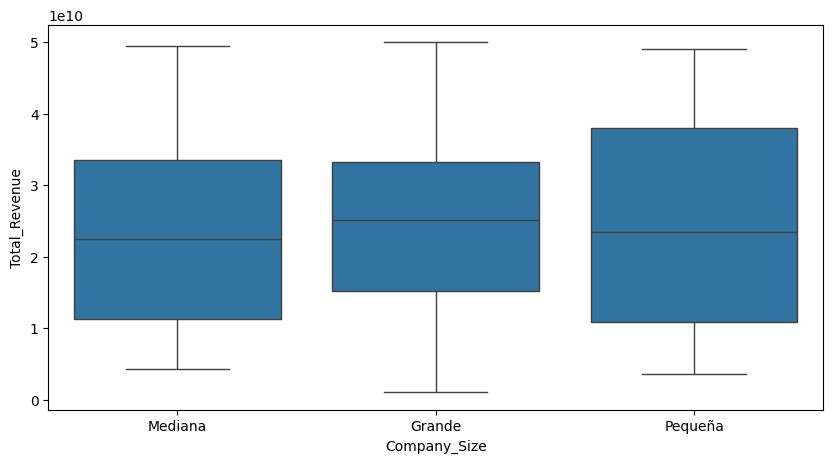

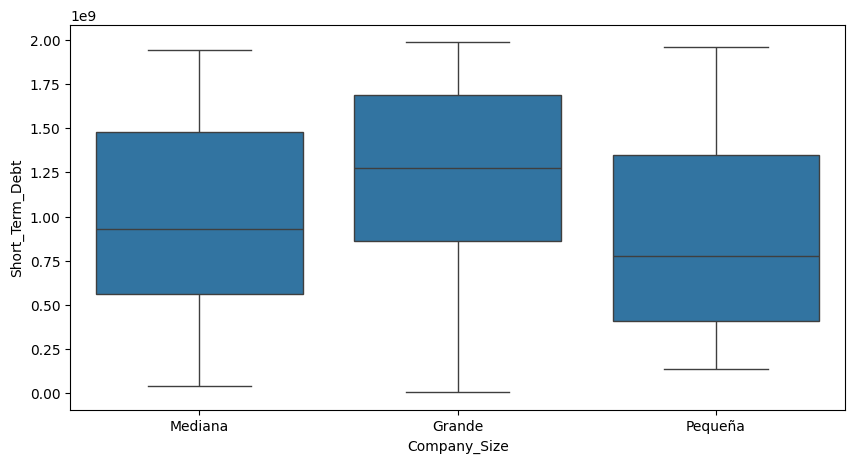

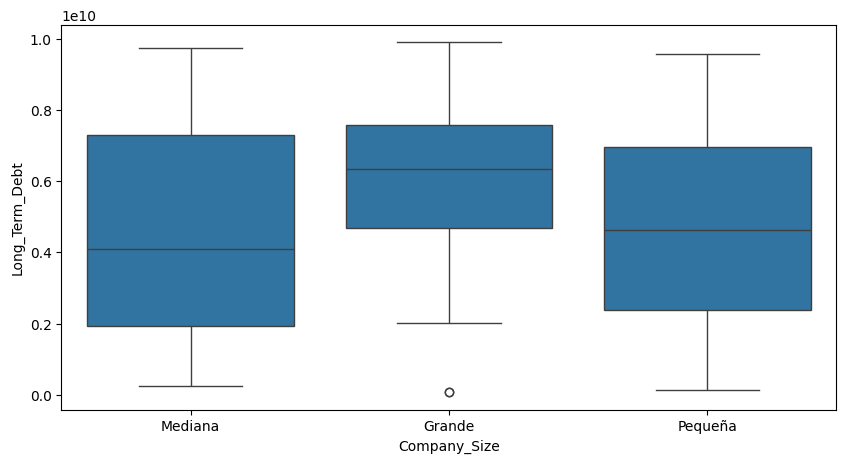

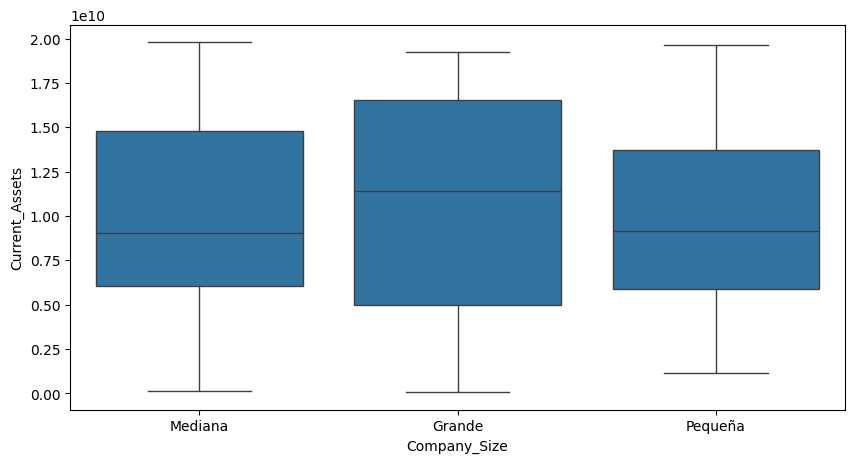

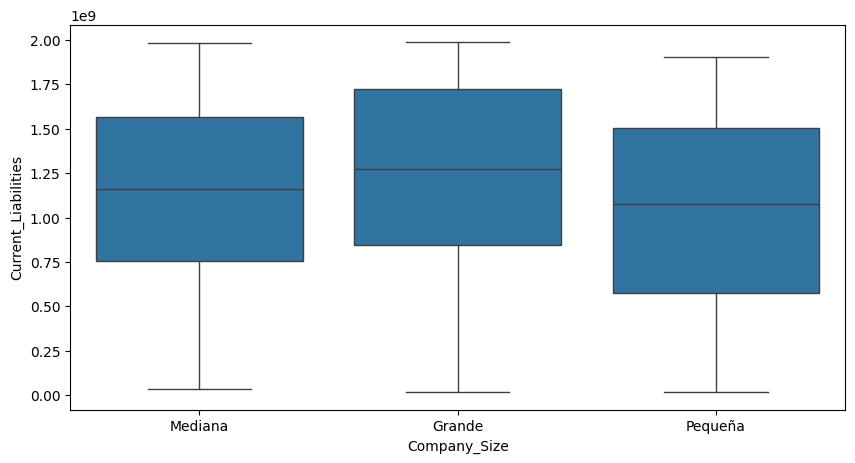

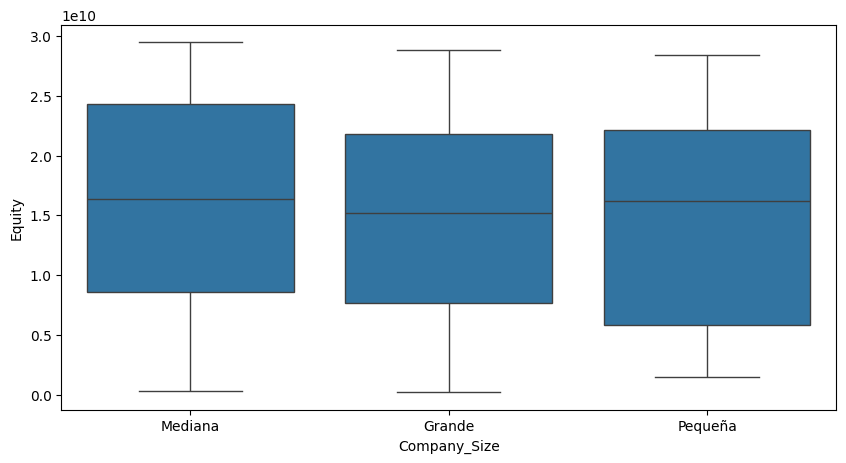

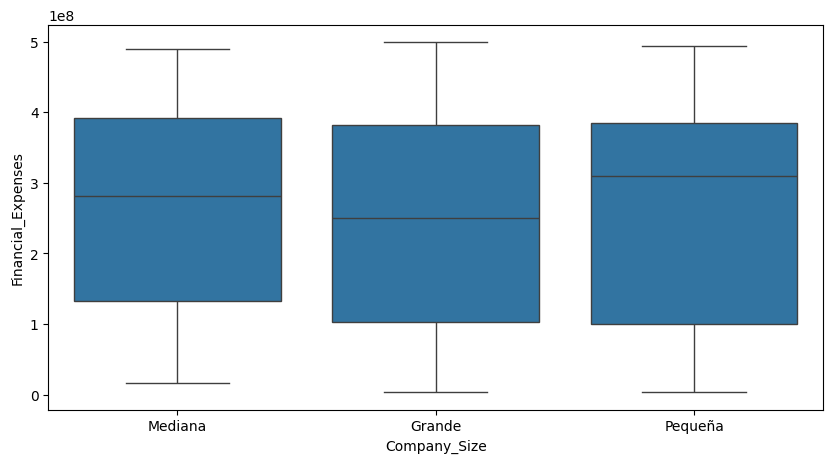

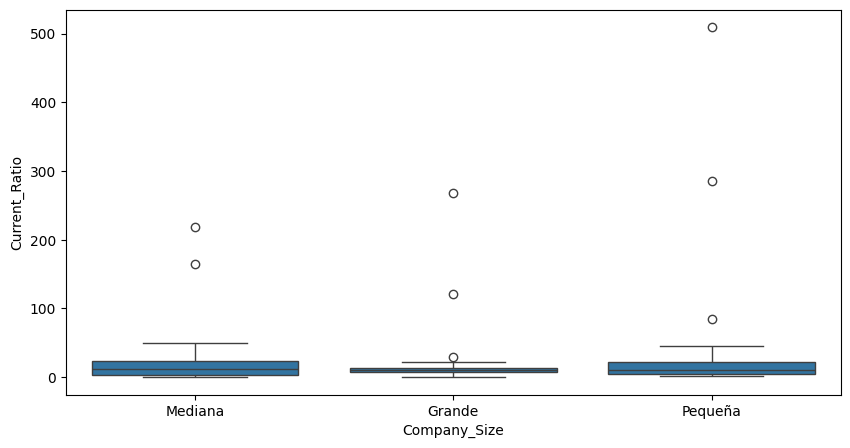

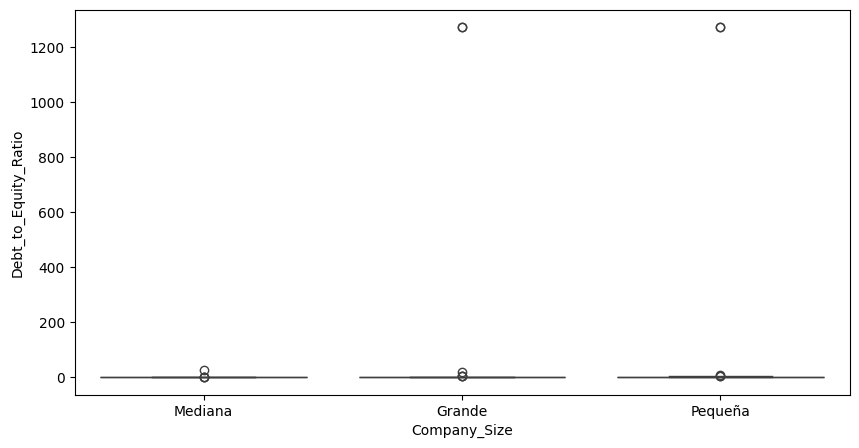

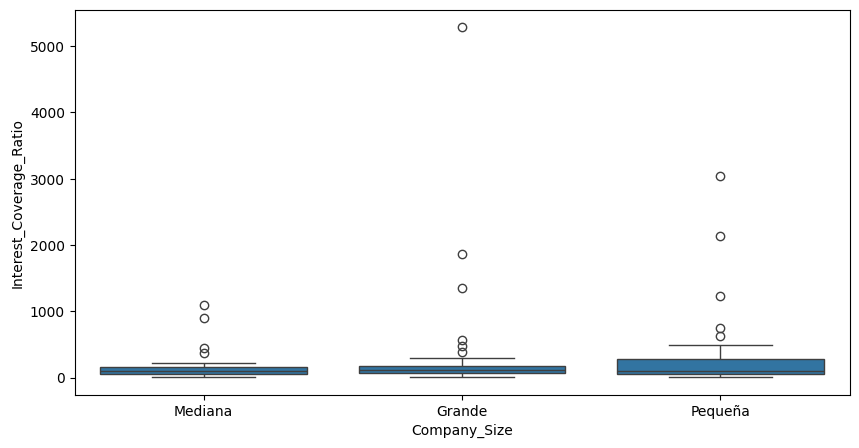

In [ ]:
#Revisar distribución de variables numéricas mediante gráficos de cajas y bigotes
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
  if df[column].dtype in ['int64', 'float64']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Company_Size', y=column, data=df)
    plt.show()

,Long_Term_Debt
count,9.900000e+01
mean,5.191377e+09
std,2.729609e+09
min,8.056748e+07
25%,2.756476e+09
50%,5.422071e+09
75%,7.465599e+09
max,9.901867e+09


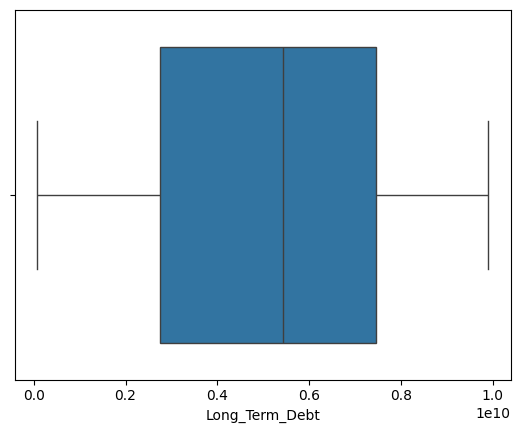

In [ ]:
#Se analiza la variable long_term_debt, y decidimos mantener todos los registros
sns.boxplot(x='Long_Term_Debt', data=df)
df['Long_Term_Debt'].describe()

,Current_Ratio
count,99.000000
mean,27.482121
std,68.196948
min,0.040000
25%,4.410000
50%,10.410000
75%,18.405000
max,509.350000


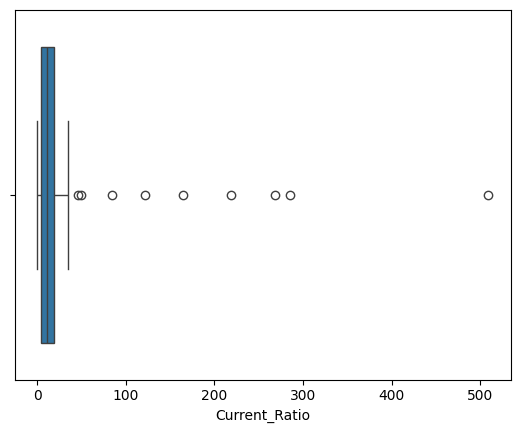

In [ ]:
#Se analiza la variable Current_Ratio, y decidimos mantener todos los registros
#Lo anterior derivado de la verificación de dicha variable: df['cratio'] = df['Current_Assets'] / df['Current_Liabilities']

sns.boxplot(x='Current_Ratio', data=df)
df['Current_Ratio'].describe()

,Debt_to_Equity_Ratio
count,99.000000
mean,52.492828
std,251.325095
min,0.030000
25%,0.245000
50%,0.420000
75%,0.840000
max,1271.000000


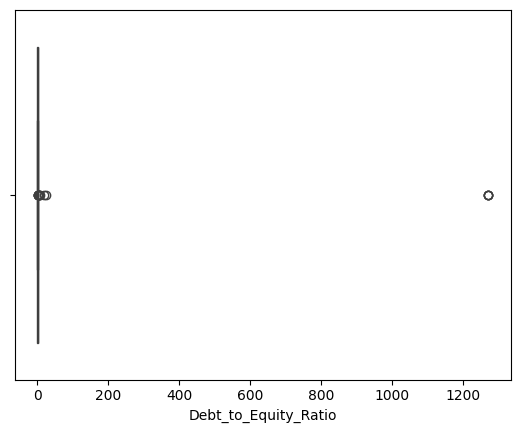

In [ ]:
#Se analiza la variable Debt_to_Equity_Ratio
sns.boxplot(x='Debt_to_Equity_Ratio', data=df)
df['Debt_to_Equity_Ratio'].describe()

In [ ]:
df[df['Debt_to_Equity_Ratio'] > 1000]
#Se observa que 4 registros tienen el mismo valor en Debt_to_Equity_Ratio, lo que no hace sentido, por lo que decidimos eliminarlos
df = df[df['Debt_to_Equity_Ratio'] <= 1000]

,Debt_to_Equity_Ratio
count,95.000000
mean,1.187263
std,3.258402
min,0.030000
25%,0.235000
50%,0.410000
75%,0.740000
max,25.420000


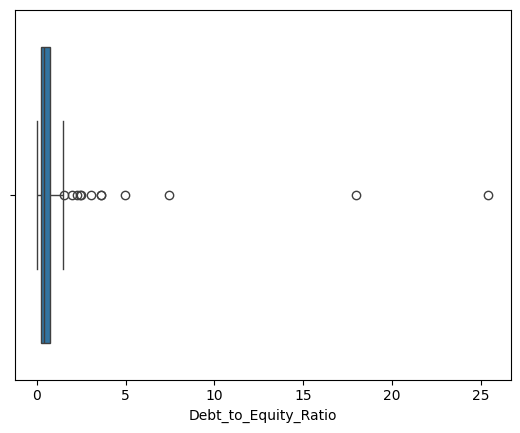

In [ ]:
#Volvemos a graficar el boxplot de Debt_to_Equity_Ratio, en este caso ahora el valor máximo es 25.42, por lo que decidimos mantener los registros
sns.boxplot(x='Debt_to_Equity_Ratio', data=df)
df['Debt_to_Equity_Ratio'].describe()

,Interest_Coverage_Ratio
count,95.000000
mean,302.564316
std,692.967232
min,7.230000
25%,47.655000
50%,101.380000
75%,204.765000
max,5287.050000


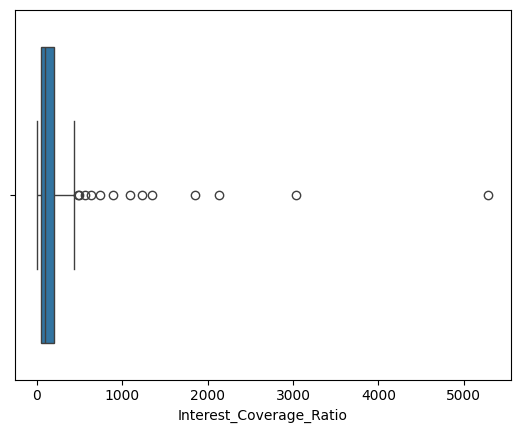

In [ ]:
#Analizamos la variable Interest_Coverage_Ratio, decidimos mantener todos los registros para evitar pérdida de información
sns.boxplot(x='Interest_Coverage_Ratio', data=df)
df['Interest_Coverage_Ratio'].describe()

In [ ]:
#Eliminamos la columna duplicados y exportamos el dataframe limpio a un archivo csv
#df = df.drop('duplicados', axis=1)
df.to_csv('Datos_proyecto_limpio.csv', index=False)